In [2]:
import segmentation_models_pytorch as smp

model = smp.Unet()

c:\Users\waren\mambaforge\envs\cc\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\waren/.cache\torch\hub\checkpoints\resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 27.3MB/s]


In [5]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import io
from skimage.segmentation import chan_vese
import os

In [3]:
image_dir = "data\Dataset"

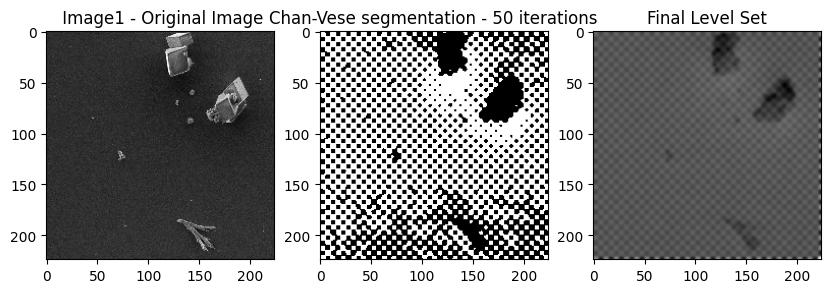

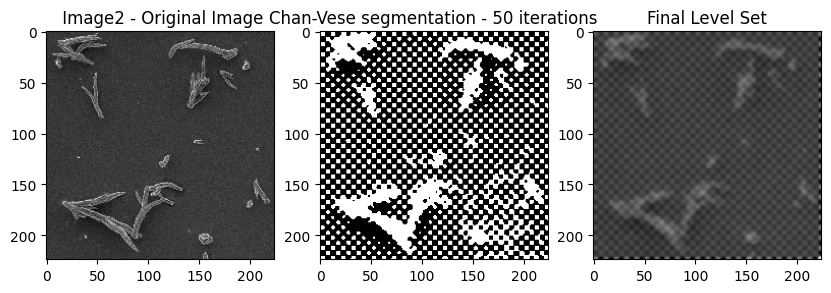

In [18]:
image_files = [file for file in os.listdir(image_dir) if file.endswith(".tif")]

#fig, axes = plt.subplots(len(image_files), 3, figsize=(10,10))

for i, image_file in enumerate(image_files[:2]):
    fig, axes = plt.subplots(1, 3, figsize=(10,50))
    image_path = os.path.join(image_dir, image_file)
    image = io.imread(image_path)
    gray = rgb2gray(image)
    chanvese_gray_astronaut = chan_vese(gray,
									max_num_iter=100,
									extended_output=True)
    ax = axes.flatten()
    ax[0].imshow(gray, cmap="gray")
    ax[0].set_title(f" Image{i+1} - Original Image")
    ax[1].imshow(chanvese_gray_astronaut[0], cmap="gray")
    title = "Chan-Vese segmentation - {} iterations".format(len(chanvese_gray_astronaut[2]))
    ax[1].set_title(title)
    ax[2].imshow(chanvese_gray_astronaut[1], cmap="gray")
    ax[2].set_title("Final Level Set")
    plt.show()


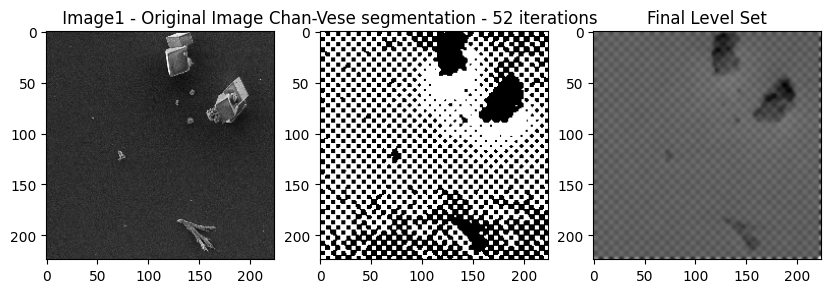

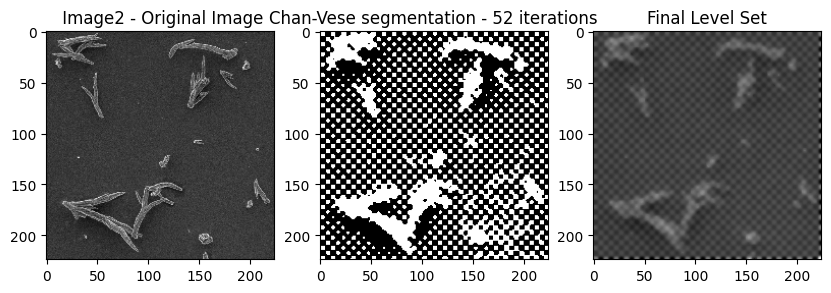

In [73]:
image_files = [file for file in os.listdir(image_dir) if file.endswith(".tif")]

#fig, axes = plt.subplots(len(image_files), 3, figsize=(10,10))

for i, image_file in enumerate(image_files[:2]):
    fig, axes = plt.subplots(1, 3, figsize=(10,50))
    image_path = os.path.join(image_dir, image_file)
    image = io.imread(image_path)
    gray = rgb2gray(image)
    chanvese_gray_astronaut = chan_vese(gray,mu=0.2, lambda1=1, lambda2=1, tol=1e-3,
									max_num_iter=120,dt=0.5, init_level_set="checkerboard",
									extended_output=True)
    #cv = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3,
               #max_num_iter=200, dt=0.5, init_level_set="checkerboard",
              # extended_output=True)
    
    
    ax = axes.flatten()
    ax[0].imshow(gray, cmap="gray")
    ax[0].set_title(f" Image{i+1} - Original Image")
    ax[1].imshow(chanvese_gray_astronaut[0], cmap="gray")
    title = "Chan-Vese segmentation - {} iterations".format(len(chanvese_gray_astronaut[2]))
    ax[1].set_title(title)
    ax[2].imshow(chanvese_gray_astronaut[1], cmap="gray")
    ax[2].set_title("Final Level Set")
    plt.show()


In [75]:
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import numpy as np

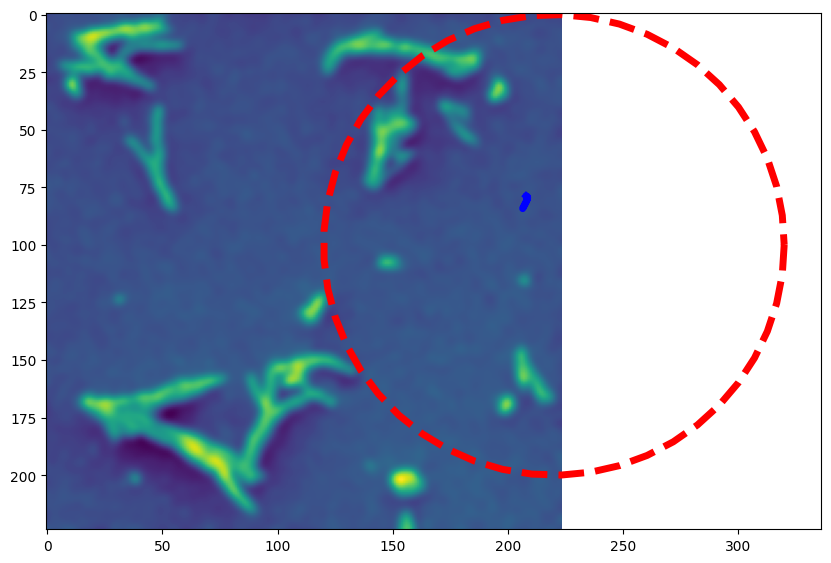

In [81]:
for i, image_file in enumerate(image_files[:1]):
        gray_astronaut_noiseless = gaussian(gray, 2)

        x1 = 220 + 100*np.cos(np.linspace(0, 2*np.pi, 50))
        x2 = 100 + 100*np.sin(np.linspace(0, 2*np.pi, 50))
 
        snake = np.array([x1, x2]).T

        astronaut_snake = active_contour(gray_astronaut_noiseless,
                                 snake)
 
        fig = plt.figure(figsize=(10, 10))
 
        ax = fig.add_subplot(111)
 
        ax.imshow(gray_astronaut_noiseless)
 
        ax.plot(astronaut_snake[:, 0],
                astronaut_snake[:, 1],
                '-b', lw=5)
 
        ax.plot(snake[:, 0], snake[:, 1], '--r', lw=5)

In [136]:
from skimage.segmentation import slic
from skimage.color import label2rgb
import skimage

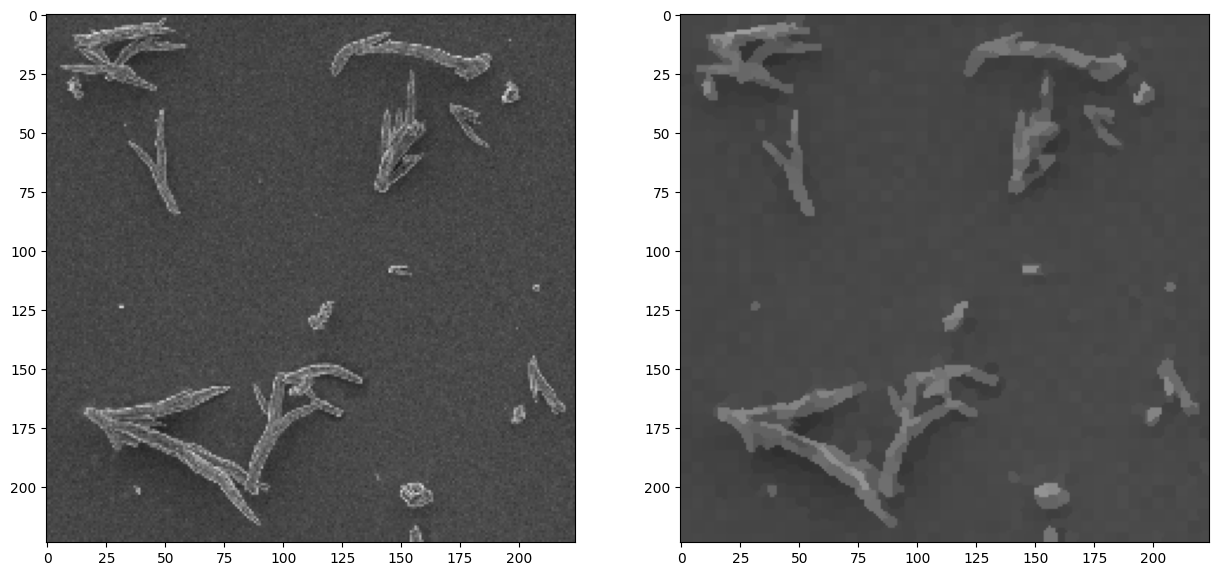

In [118]:
for i, image_file in enumerate(image_files[:1]):
	plt.figure(figsize=(15,15))

	image = io.imread(image_path)
	
	segments = slic(image,
						n_segments=2000,
						compactness=5, sigma = 1)
	plt.subplot(1,2,1)

# Plotting the original image
	plt.imshow(image)
	plt.subplot(1,2,2)

	plt.imshow(label2rgb(segments,
						image,
						kind = 'avg'))


In [142]:
img_segmented = label2rgb(segments, image, kind = 'avg')
img_gray = skimage.color.rgb2gray(img_segmented)
img_gray

array([[0.2745098 , 0.2745098 , 0.2745098 , ..., 0.27058824, 0.27058824,
        0.27058824],
       [0.2745098 , 0.2745098 , 0.2745098 , ..., 0.27058824, 0.27058824,
        0.27058824],
       [0.2745098 , 0.2745098 , 0.2745098 , ..., 0.27058824, 0.27058824,
        0.27058824],
       ...,
       [0.27843137, 0.27843137, 0.27843137, ..., 0.29019608, 0.29019608,
        0.29019608],
       [0.27843137, 0.27843137, 0.27843137, ..., 0.29019608, 0.29019608,
        0.29019608],
       [0.27843137, 0.27843137, 0.27843137, ..., 0.29019608, 0.29019608,
        0.29019608]])

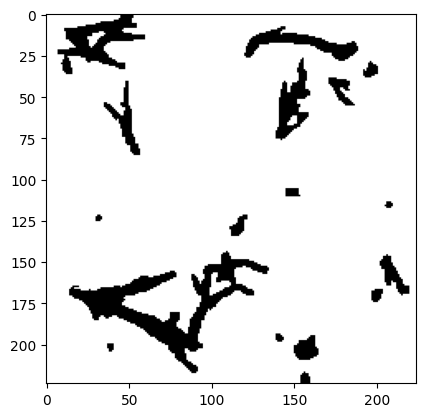

In [160]:
t = 0.31
bin_mask = img_gray < t

fig, ax = plt.subplots()
plt.imshow(bin_mask, cmap="gray")

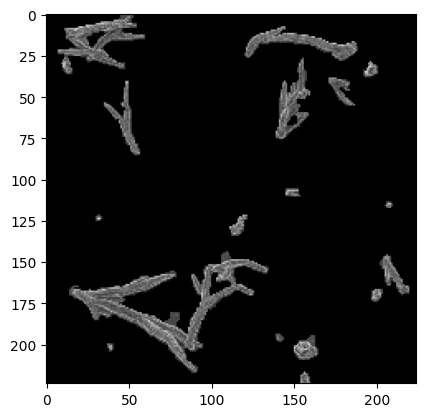

In [161]:
selection = image.copy()
selection[bin_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection)

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-segmentation", model="CIDAS/clipseg-rd64-refined")

In [ ]:
# Load model directly
from transformers import AutoProcessor, CLIPSegForImageSegmentation

processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

In [117]:
from transformers import AutoProcessor, CLIPSegForImageSegmentation
from PIL import Image
import requests

ImportError: cannot import name 'CLIPSegForImageSegmentation' from 'transformers' (c:\Users\waren\mambaforge\envs\cc\lib\site-packages\transformers\__init__.py)

In [112]:
processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

texts = ["particle"]
for i, image_file in enumerate(image_files[:1]):
    image = io.imread(image_path)
    texts = ["particle"]
    inputs = processor(text=texts, images=[image] * len(texts), padding=True, return_tensors="pt")
    outputs = model(**inputs)

    logits = outputs.logits
print(logits.shape)

c:\Users\waren\mambaforge\envs\cc\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'CLIPSegForImageSegmentation' from 'transformers' (c:\Users\waren\mambaforge\envs\cc\lib\site-packages\transformers\__init__.py)